#***Google Drive mounting***

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#***Unzipping the folder***

In [ ]:
!unzip '/content/drive/MyDrive/slash.zip'  -d '/content/drive/MyDrive/'

Archive:  /content/drive/MyDrive/slash.zip
   creating: /content/drive/MyDrive/slash/Artifacts/
  inflating: /content/drive/MyDrive/slash/Artifacts/IMG_2176.PNG  
  inflating: /content/drive/MyDrive/slash/Artifacts/IMG_E2074.JPG  
  inflating: /content/drive/MyDrive/slash/Artifacts/IMG_E2075.JPG  
  inflating: /content/drive/MyDrive/slash/Artifacts/IMG_E2076.JPG  
  inflating: /content/drive/MyDrive/slash/Artifacts/IMG_E2077.JPG  
  inflating: /content/drive/MyDrive/slash/Artifacts/IMG_E2078.JPG  
  inflating: /content/drive/MyDrive/slash/Artifacts/IMG_E2079.JPG  
  inflating: /content/drive/MyDrive/slash/Artifacts/IMG_E2080.JPG  
  inflating: /content/drive/MyDrive/slash/Artifacts/IMG_E2081.JPG  
  inflating: /content/drive/MyDrive/slash/Artifacts/IMG_E2082.JPG  
  inflating: /content/drive/MyDrive/slash/Artifacts/IMG_E2083.JPG  
  inflating: /content/drive/MyDrive/slash/Artifacts/IMG_E2084.JPG  
  inflating: /content/drive/MyDrive/slash/Artifacts/IMG_E2085.JPG  
  inflating: /content

#**Single Image analysis Using PIL Library **

In [ ]:
from PIL import Image

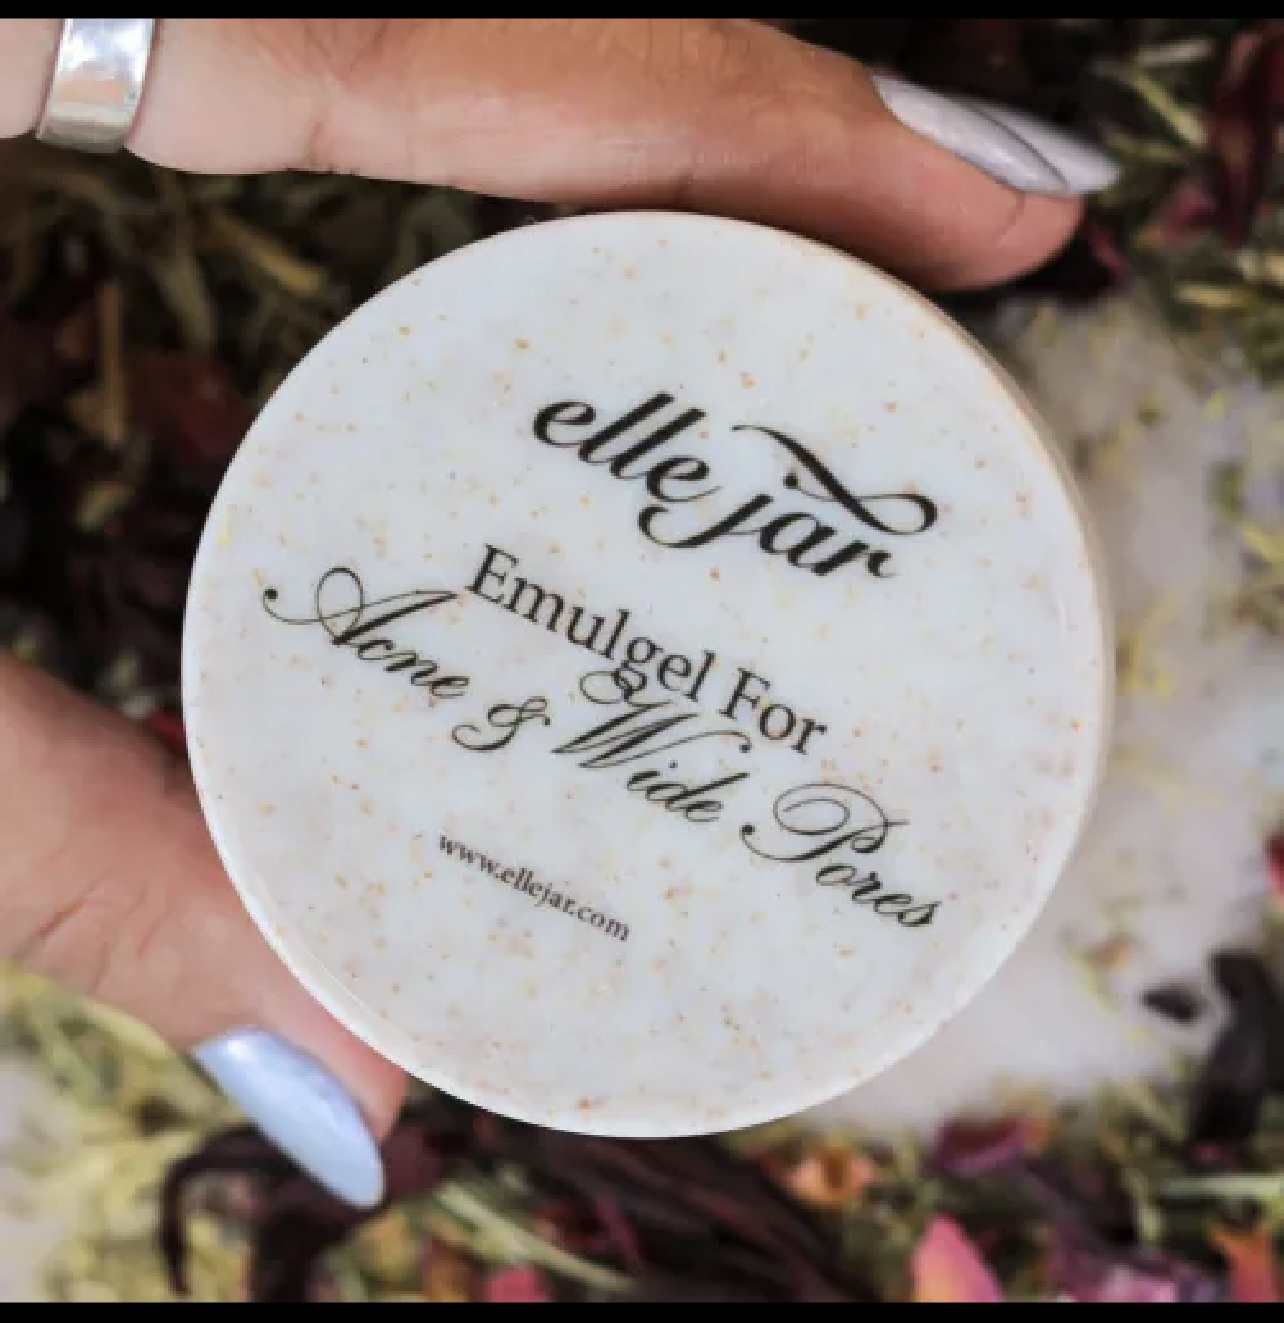

In [ ]:
Image.open('/content/drive/MyDrive/slash/Beauty/IMG_E1847.JPG')

In [ ]:
import os
import matplotlib.pyplot as plt
from PIL import Image

#**Multiple Image Visulization**

In [ ]:
train_loader = '/content/drive/MyDrive/slash/Artifacts'

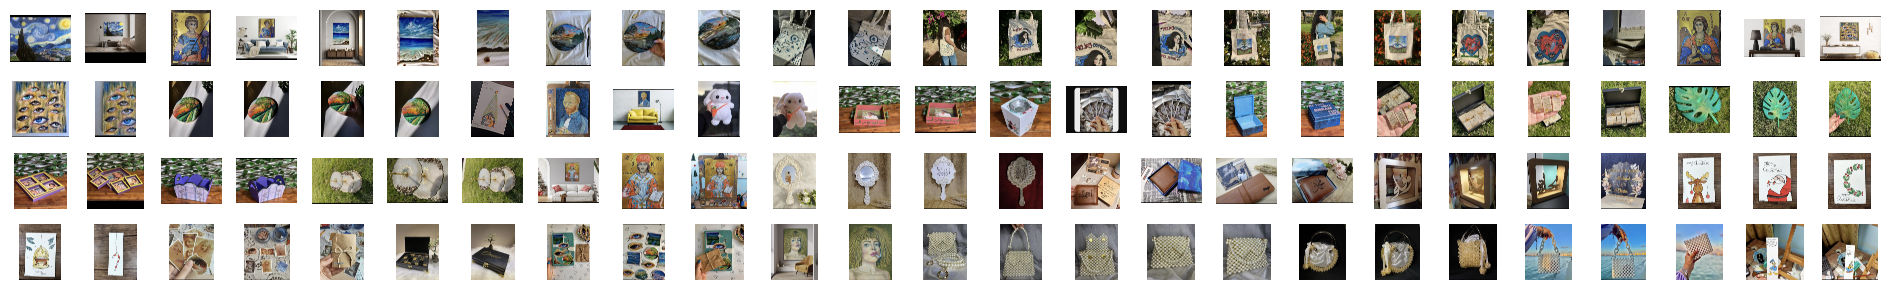

In [ ]:
image_files = [f for f in os.listdir(train_loader) if f.endswith(('.JPG', '.jpeg', '.png', '.gif'))]
num_rows = 4
num_cols = len(image_files) // 4
fig, axes = plt.subplots(num_rows, num_cols, figsize=(19,3))
if num_rows == 1:
    axes = axes.reshape(1, -1)
if num_cols == 1:
    axes = axes.reshape(-1, 1)
for i, ax in enumerate(axes.flat):
    if i < len(image_files):
        image_path = os.path.join(train_loader, image_files[i])
        img = Image.open(image_path)
        ax.imshow(img)  # Display the image
        ax.axis('off')

plt.tight_layout()
plt.show()

In [75]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [76]:
root_directory = '/content/drive/MyDrive/slash'

In [77]:
train_dataset_imageGenrator = ImageDataGenerator(
    rescale = 1./255,
    rotation_range =21,
    width_shift_range =0.2,
    height_shift_range = 0.2,
    shear_range =0.2,
    zoom_range =0.2,
    horizontal_flip = True,
    fill_mode = 'nearest'
)

In [78]:
image_width = 120
image_height = 120

In [79]:
train_dataset =  train_dataset_imageGenrator.flow_from_directory(root_directory, target_size=(image_width,image_height), batch_size=32 , class_mode='categorical')

Found 329 images belonging to 5 classes.


In [80]:
classes_name = train_dataset.class_indices

In [81]:
classes_name = list(classes_name.keys())

In [82]:
'Total Number of Classes {x}'.format(x = len(train_dataset.class_indices))

'Total Number of Classes 5'

In [83]:
image, label  = next(train_dataset)

In [84]:
classes_name

['Artifacts', 'Beauty', 'Fashion', 'Games', 'Nutrition']

In [85]:
image.shape

(32, 120, 120, 3)

In [86]:
label.shape

(32, 5)

In [87]:
import os

In [88]:
total_image_for_each_class = {}
n=5
for i in  range(n):
  print('Total number of images in {x} class is : {y} \n'.format(x = classes_name[i], y = len(os.listdir('/content/drive/MyDrive/slash/' + str(classes_name[i])))))
  total_image_for_each_class[classes_name[i]] = len(os.listdir('/content/drive/MyDrive/slash/'+ str(classes_name[i])))

Total number of images in Artifacts class is : 103 

Total number of images in Beauty class is : 36 

Total number of images in Fashion class is : 129 

Total number of images in Games class is : 35 

Total number of images in Nutrition class is : 26 



In [89]:
classes_name = list(total_image_for_each_class.keys())
number_of_images = list(total_image_for_each_class.values())

In [90]:
import seaborn as sns
import matplotlib.pyplot as plt


#**Total Images Analysis**

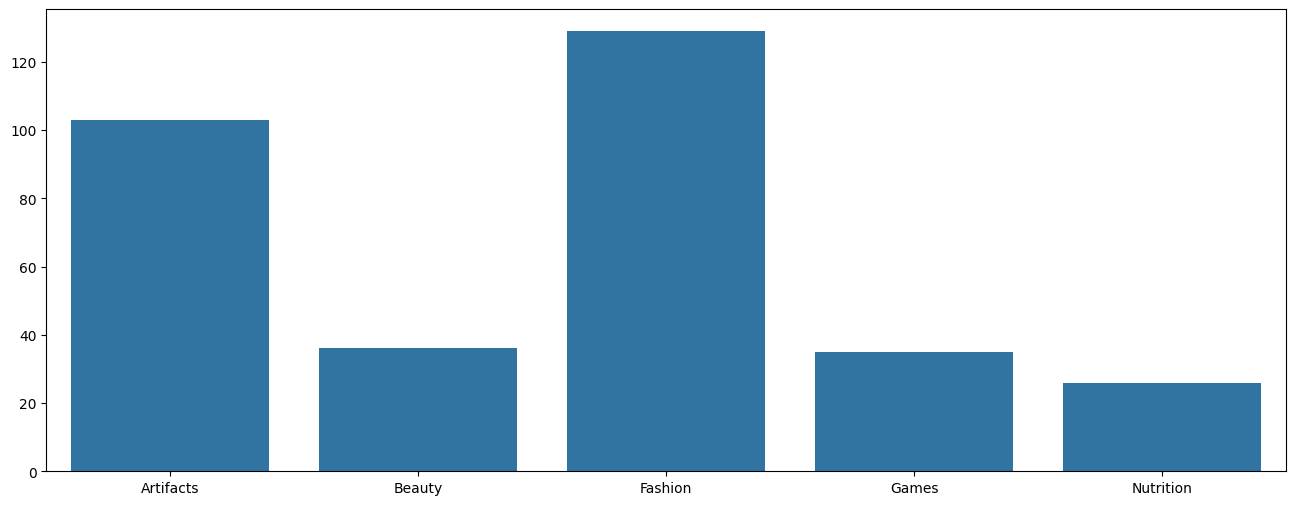

In [91]:
plt.figure(figsize=(16,6))
sns.barplot(x = classes_name, y= number_of_images)
plt.show()

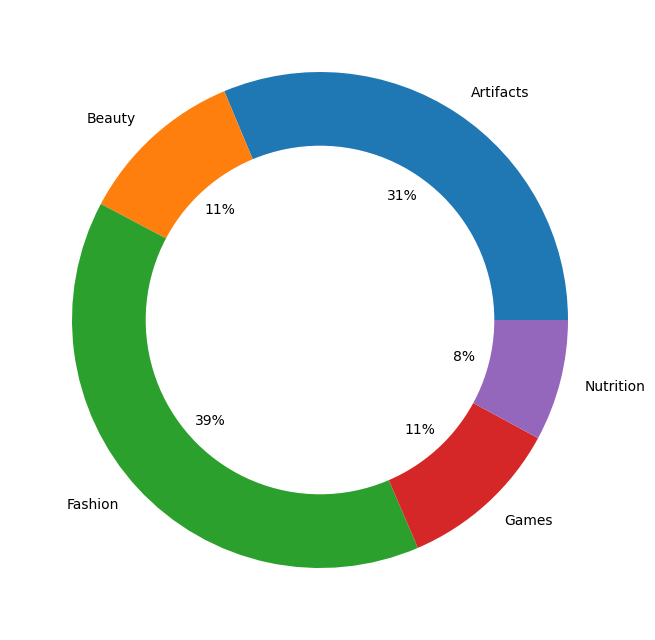

In [92]:
plt.figure(figsize=(8,11))
plt.pie(number_of_images, labels=classes_name, autopct = '%.0f%%')
p = plt.gcf()
p.gca().add_artist(plt.Circle((0,0), 0.7,color = 'white'))
plt.show()

#**Images Conversion into Numpy Array**

In [93]:
#convert the images into numpy arrays because normal images takes too much time during training

In [94]:
#here is creat the function for the conversion

In [123]:
def load_images_to_numpy(root_dir):
    image_data = []
    labels = []
    class_folders = sorted(os.listdir(root_dir))
    label_to_class = {i: class_name for i, class_name in enumerate(class_folders)}

    for label, class_name in enumerate(class_folders):
        class_path = os.path.join(root_dir, class_name)
        for image_filename in os.listdir(class_path):
            image_path = os.path.join(class_path, image_filename)
            img = Image.open(image_path)
            img = img.resize((120,120))
            img_array = np.array(img)  # Cnovert PIL image to NumPy array
            image_data.append(img_array)
            labels.append(label)

    image_data = np.array(image_data)
    labels = np.array(labels)
    return image_data, labels

In [124]:
import os
from PIL import Image
import numpy as np

In [125]:
data_root = '/content/drive/MyDrive/slash'
X_train_np, y_train_np = load_images_to_numpy(data_root)

print("Shape of X_train_np:", X_train_np.shape)
print("Shape of y_train:", y_train_np.shape)

Shape of X_train_np: (329, 120, 120, 3)
Shape of y_train: (329,)


#**Data Augmentation**

In [126]:
 from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [127]:
datagen = ImageDataGenerator(
    rotation_range=20,       # Random rotation within +/- 20 degrees
    width_shift_range=0.2,   # Random horizontal shift within +/- 20% of image width
    height_shift_range=0.2,  # Random vertical shift within +/- 20% of image height
    shear_range=0.2,         # Random shear transformation
    zoom_range=0.2,          # Random zoom within +/- 20%
    horizontal_flip=True,    # Randomly flip images horizontally
    fill_mode='nearest'      # Fill any new pixels after transformation with the nearest pixel value
)

In [128]:

import tensorflow as tf
from sklearn.model_selection import train_test_split

#**Data Splitting and OneHot Encoding**

In [129]:
X_train, X_val, y_train, y_val = train_test_split(X_train_np, y_train_np, test_size=0.2, random_state=42)

In [130]:
# Further split the temporary set into validation (10%) and test (10%) sets
X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, test_size=0.5, random_state=42)


In [131]:

from tensorflow.keras.utils import to_categorical

In [132]:
num_classes = 5
y_train_onehot = to_categorical(y_train, num_classes)
y_val_onehot = to_categorical(y_val, num_classes)
y_test_onehot = to_categorical(y_test,num_classes)

In [133]:
y_train_onehot

array([[1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.]], dtype=float32)

In [134]:
datagen.fit(X_train)

In [135]:
batch_size = 32
steps_per_epoch = len(X_train_np) // batch_size

augmented_data = datagen.flow(X_train, y_train_onehot, batch_size=batch_size)

#**Sequentional Convolutional Neural Network Model Building**

In [150]:
import tensorflow as tf
from tensorflow.keras import layers, models

In [151]:
model = models.Sequential([])

In [152]:
model.add(layers.Conv2D(256, (3,3), activation= 'relu', input_shape= (120,120,3)))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(128,(3,3),activation = 'relu'))
model.add(layers.MaxPool2D(2,2))
model.add(layers.Flatten())
model.add(layers.Dense(32,activation = 'relu'))
model.add(layers.Dense(5,activation =  'softmax'))

#**Model Compilation and Traning**

In [153]:
model.compile(optimizer='adam', loss= 'categorical_crossentropy', metrics= ['accuracy'])

In [154]:
modelss = model.fit(augmented_data,  epochs=50, batch_size=32 ,validation_data=(X_val, y_val_onehot))

Epoch 1/50
9/9 [==============================] - 3s 148ms/step - loss: 155.0730 - accuracy: 0.2471 - val_loss: 1.5689 - val_accuracy: 0.3030
Epoch 2/50
9/9 [==============================] - 1s 132ms/step - loss: 1.5769 - accuracy: 0.3194 - val_loss: 1.4967 - val_accuracy: 0.4242
Epoch 3/50
9/9 [==============================] - 1s 129ms/step - loss: 1.5824 - accuracy: 0.3650 - val_loss: 1.5996 - val_accuracy: 0.3939
Epoch 4/50
9/9 [==============================] - 1s 134ms/step - loss: 1.5622 - accuracy: 0.3688 - val_loss: 1.5564 - val_accuracy: 0.3333
Epoch 5/50
9/9 [==============================] - 2s 189ms/step - loss: 1.5514 - accuracy: 0.3802 - val_loss: 1.5797 - val_accuracy: 0.3636
Epoch 6/50
9/9 [==============================] - 2s 219ms/step - loss: 1.5603 - accuracy: 0.3802 - val_loss: 1.5698 - val_accuracy: 0.3636
Epoch 7/50
9/9 [==============================] - 1s 134ms/step - loss: 1.5490 - accuracy: 0.4221 - val_loss: 1.5793 - val_accuracy: 0.3333
Epoch 8/50
9/9 [==

In [155]:
import matplotlib.pyplot as plt

#**Model Analysis for Accuracy and Loss**

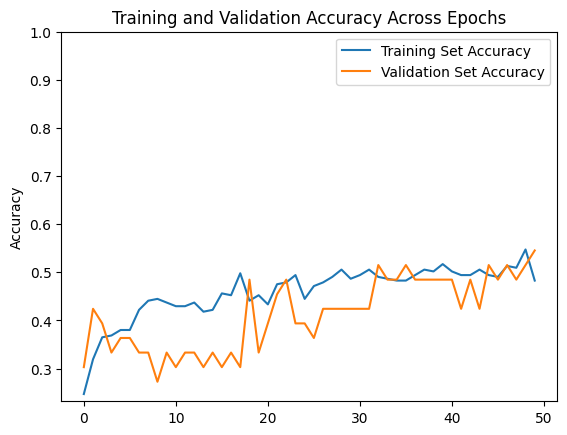

In [156]:
accuracy = modelss.history['accuracy']
validation_accuracy = modelss.history['val_accuracy']
plt.plot(accuracy, label='Training Set Accuracy')
plt.plot(validation_accuracy, label='Validation Set Accuracy')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy Across Epochs')
plt.legend()

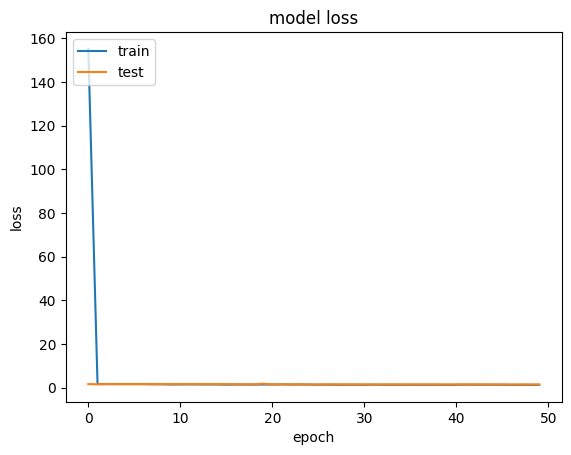

In [157]:
#loss
plt.plot(modelss.history['loss'])
plt.plot(modelss.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#Model Save

In [158]:
model.save('skin_cancer_np.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


#Model Evalution

In [159]:
val_loss, val_accuracy = model.evaluate(X_val, y_val_onehot)

2/2 [==============================] - 0s 9ms/step - loss: 1.4133 - accuracy: 0.5455


In [160]:
print(f"Val Accuracy: {val_accuracy * 100:.2f}%" + '\n'+f"Val loss: {val_loss * 100:.2f}%")

Val Accuracy: 54.55%
Val loss: 141.33%


In [161]:
test_loss, test_accuracy = model.evaluate(X_test,y_test_onehot)

2/2 [==============================] - 0s 11ms/step - loss: 1.1746 - accuracy: 0.5758


In [162]:
print(f"test Accuracy: {test_accuracy * 100:.2f}%" + '\n'+f"test loss: {test_loss * 100:.2f}%")

test Accuracy: 57.58%
test loss: 117.46%


#Model Training with early stopping method

In [163]:
from keras.callbacks import EarlyStopping

callbacks = [EarlyStopping(monitor='val_loss', patience=8)]

In [164]:
modelss = model.fit(augmented_data,  epochs=100, batch_size=32,callbacks = callbacks ,validation_data=(X_val, y_val_onehot))

Epoch 1/100
9/9 [==============================] - 1s 136ms/step - loss: 1.2485 - accuracy: 0.4943 - val_loss: 1.4160 - val_accuracy: 0.5152
Epoch 2/100
9/9 [==============================] - 2s 148ms/step - loss: 1.3006 - accuracy: 0.4791 - val_loss: 1.4170 - val_accuracy: 0.4545
Epoch 3/100
9/9 [==============================] - 2s 202ms/step - loss: 1.2695 - accuracy: 0.4867 - val_loss: 1.3938 - val_accuracy: 0.4848
Epoch 4/100
9/9 [==============================] - 2s 214ms/step - loss: 1.3358 - accuracy: 0.4791 - val_loss: 1.3888 - val_accuracy: 0.3939
Epoch 5/100
9/9 [==============================] - 1s 131ms/step - loss: 1.3428 - accuracy: 0.4068 - val_loss: 1.3844 - val_accuracy: 0.4242
Epoch 6/100
9/9 [==============================] - 1s 153ms/step - loss: 1.2918 - accuracy: 0.4677 - val_loss: 1.4650 - val_accuracy: 0.4545
Epoch 7/100
9/9 [==============================] - 1s 132ms/step - loss: 1.3537 - accuracy: 0.4981 - val_loss: 1.4779 - val_accuracy: 0.4848
Epoch 8/100
9

#**Accuracy and loss Analysis for EarlyStopping**

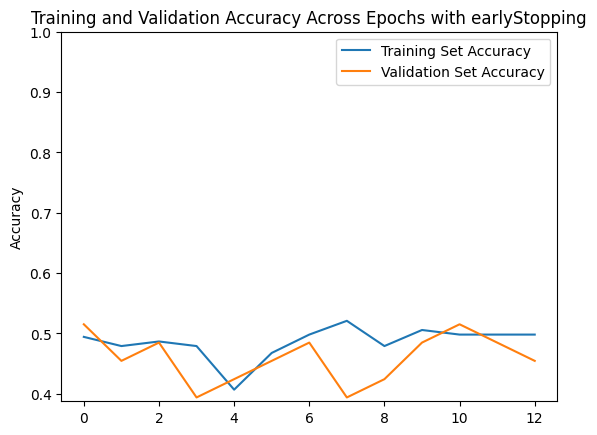

In [165]:
accuracy = modelss.history['accuracy']
validation_accuracy = modelss.history['val_accuracy']
plt.plot(accuracy, label='Training Set Accuracy')
plt.plot(validation_accuracy, label='Validation Set Accuracy')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy Across Epochs with earlyStopping')
plt.legend()

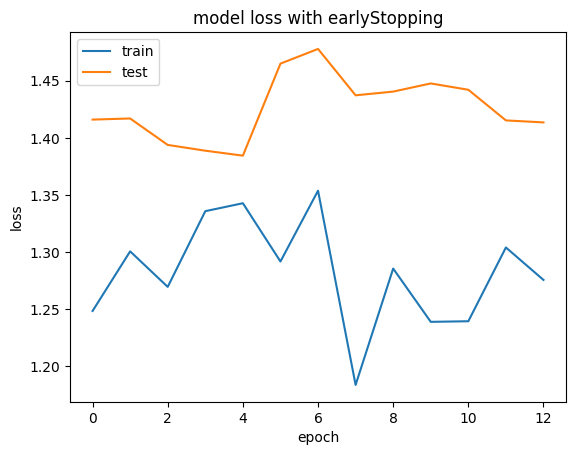

In [166]:
plt.plot(modelss.history['loss'])
plt.plot(modelss.history['val_loss'])
plt.title('model loss with earlyStopping')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [167]:
model.save('skin_cancer_np_EarlyStopping.h5')

#**Model Evalution with EarlyStopping Method**

In [168]:
val_loss, val_accuracy = model.evaluate(X_val, y_val_onehot)

2/2 [==============================] - 0s 9ms/step - loss: 1.4135 - accuracy: 0.4545


In [169]:
print(f"Val Accuracy with earlyStopping: {val_accuracy * 100:.2f}%" + '\n'+f"Val loss: {val_loss * 100:.2f}%")

Val Accuracy with earlyStopping: 45.45%
Val loss: 141.35%


In [170]:
test_loss, test_accuracy = model.evaluate(X_test,y_test_onehot)

2/2 [==============================] - 0s 10ms/step - loss: 1.2752 - accuracy: 0.5758


In [171]:
print(f"test Accuracy with earlyStopping: {test_accuracy * 100:.2f}%" + '\n'+f"test loss: {test_loss * 100:.2f}%")

test Accuracy with earlyStopping: 57.58%
test loss: 127.52%


#**Transfer Learning with Pre-Trainied Model ResNet50V2**

In [172]:
from tensorflow.keras.applications import ResNet50V2

In [179]:
model_con = ResNet50V2(weights='imagenet',  include_top=False, input_shape=(120,120, 3))

In [180]:
model_con.summary()

Model: "resnet50v2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 120, 120, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 126, 126, 3)          0         ['input_2[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 60, 60, 64)           9472      ['conv1_pad[0][0]']           
                                                                                                  
 pool1_pad (ZeroPadding2D)   (None, 62, 62, 64)           0         ['conv1_conv[0][0]']          
                                                                                         

In [181]:
model = models.Sequential([])

In [182]:
model.add(model_con)
model.add(layers.Flatten())
model.add(layers.Dense(32,activation = 'relu'))
model.add(layers.Dense(5,activation =  'softmax'))

In [183]:
model.compile(optimizer='adam', loss= 'categorical_crossentropy', metrics= ['accuracy'])

In [184]:
modelss = model.fit(augmented_data,  epochs=120, batch_size=32,validation_split = 0.3,callbacks = callbacks ,validation_data=(X_val, y_val_onehot))

Epoch 1/120
9/9 [==============================] - 39s 653ms/step - loss: 1.6549 - accuracy: 0.5057 - val_loss: 11.7692 - val_accuracy: 0.3333
Epoch 2/120
9/9 [==============================] - 1s 148ms/step - loss: 1.0273 - accuracy: 0.6730 - val_loss: 17.3653 - val_accuracy: 0.1515
Epoch 3/120
9/9 [==============================] - 1s 148ms/step - loss: 0.9922 - accuracy: 0.7262 - val_loss: 5.0120 - val_accuracy: 0.3333
Epoch 4/120
9/9 [==============================] - 1s 145ms/step - loss: 0.9810 - accuracy: 0.6540 - val_loss: 41.2778 - val_accuracy: 0.1818
Epoch 5/120
9/9 [==============================] - 1s 143ms/step - loss: 0.8143 - accuracy: 0.7300 - val_loss: 248.3425 - val_accuracy: 0.1515
Epoch 6/120
9/9 [==============================] - 1s 148ms/step - loss: 0.9361 - accuracy: 0.7262 - val_loss: 1629.6079 - val_accuracy: 0.3333
Epoch 7/120
9/9 [==============================] - 1s 146ms/step - loss: 0.9800 - accuracy: 0.6540 - val_loss: 161.7782 - val_accuracy: 0.3333
Ep

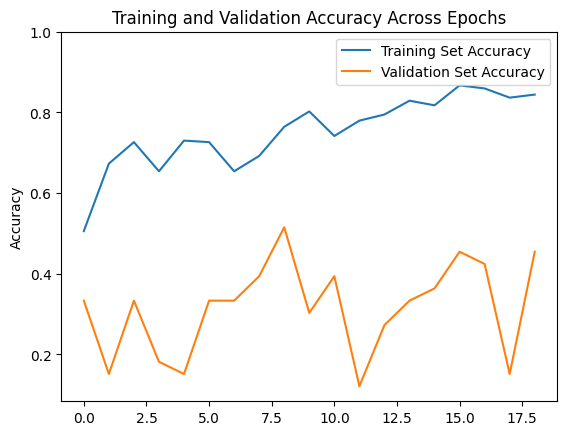

In [185]:
accuracy = modelss.history['accuracy']
validation_accuracy = modelss.history['val_accuracy']
plt.plot(accuracy, label='Training Set Accuracy')
plt.plot(validation_accuracy, label='Validation Set Accuracy')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy Across Epochs')
plt.legend()

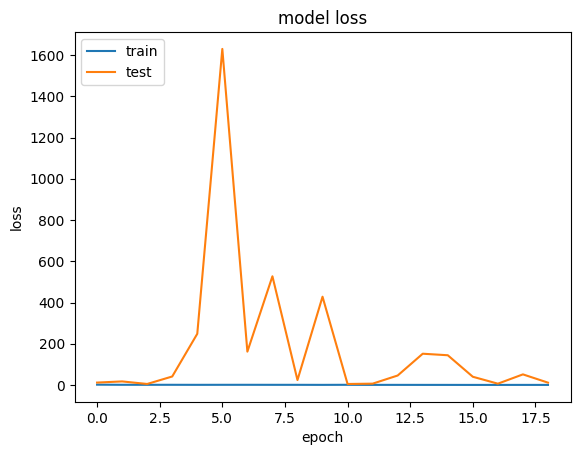

In [186]:
#loss
plt.plot(modelss.history['loss'])
plt.plot(modelss.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [187]:
model.save('skin_cancer_earlystoping_restne_final.h5')

#**Model Evaluation with ResNet50V2**

In [188]:
val_loss, val_accuracy = model.evaluate(X_val, y_val_onehot)

2/2 [==============================] - 0s 20ms/step - loss: 11.4513 - accuracy: 0.4545


In [189]:
print(f"Val Accuracy for ResNet50V2: {val_accuracy * 100:.2f}%" + '\n'+f"Val loss: {val_loss * 100:.2f}%")

Val Accuracy for ResNet50V2: 45.45%
Val loss: 1145.13%


In [190]:
test_loss, test_accuracy = model.evaluate(X_test,y_test_onehot)

2/2 [==============================] - 0s 19ms/step - loss: 4.3241 - accuracy: 0.4242


In [191]:
print(f"test Accuracy for ResNet50V2: {test_accuracy * 100:.2f}%" + '\n'+f"test loss: {test_loss * 100:.2f}%")

test Accuracy for ResNet50V2: 42.42%
test loss: 432.41%


In [192]:
#model Prediction to analysis the output

In [193]:
#

model evaluation  Classification Report

In [194]:
from tensorflow.keras.models import load_model

model_without_earlystopping = load_model('/content/skin_cancer_np.h5')


In [195]:
predictions = model_without_earlystopping.predict(X_test)

2/2 [==============================] - 0s 18ms/step


In [196]:
from sklearn.metrics import classification_report

In [197]:
predictions

array([[3.38461131e-01, 1.39827013e-01, 2.90577173e-01, 1.20354496e-01,
        1.10780187e-01],
       [1.01767041e-01, 5.10099344e-02, 7.47762978e-01, 4.80801128e-02,
        5.13798259e-02],
       [3.38461131e-01, 1.39827013e-01, 2.90577173e-01, 1.20354496e-01,
        1.10780187e-01],
       [3.38461131e-01, 1.39827013e-01, 2.90577173e-01, 1.20354496e-01,
        1.10780187e-01],
       [4.82870460e-01, 1.53633162e-01, 1.30537748e-01, 2.21243322e-01,
        1.17153386e-02],
       [3.72796995e-03, 3.34631163e-03, 9.90415335e-01, 8.78054940e-04,
        1.63222512e-03],
       [3.38461131e-01, 1.39827013e-01, 2.90577173e-01, 1.20354496e-01,
        1.10780187e-01],
       [3.38461131e-01, 1.39827013e-01, 2.90577173e-01, 1.20354496e-01,
        1.10780187e-01],
       [3.51917207e-01, 1.54013544e-01, 2.51755834e-01, 1.43595085e-01,
        9.87184122e-02],
       [1.46339685e-01, 1.02202013e-01, 7.33535171e-01, 1.34082660e-02,
        4.51483671e-03],
       [6.99603707e-02, 1.8536

In [198]:
predicted_labels = np.argmax(predictions, axis=1)
print(predicted_labels)

[0 2 0 0 0 2 0 0 0 2 2 2 0 0 0 2 0 0 2 0 0 3 2 0 0 2 0 2 0 0 0 2 0]


In [199]:
y_test

array([0, 2, 0, 0, 0, 2, 1, 0, 3, 2, 2, 2, 3, 0, 3, 1, 0, 4, 2, 4, 0, 3,
       0, 2, 2, 2, 2, 2, 3, 0, 3, 3, 0])

In [200]:
report = classification_report(y_test, predicted_labels, zero_division=1)
print('Classification Report for the model\n')
print(report)

Classification Report for the model

              precision    recall  f1-score   support

           0       0.48      0.91      0.62        11
           1       1.00      0.00      0.00         2
           2       0.73      0.73      0.73        11
           3       1.00      0.14      0.25         7
           4       1.00      0.00      0.00         2

    accuracy                           0.58        33
   macro avg       0.84      0.36      0.32        33
weighted avg       0.73      0.58      0.50        33



In [201]:
from tensorflow.keras.models import load_model

model_earlystopping = load_model('/content/skin_cancer_np_EarlyStopping.h5')


In [202]:
prediction = model_earlystopping.predict(X_test)

2/2 [==============================] - 0s 18ms/step


In [203]:
predicted_labels = np.argmax(prediction, axis=1)
print(predicted_labels)

[0 2 0 0 0 2 0 0 0 2 2 2 0 0 0 2 0 0 2 0 0 0 0 0 0 2 0 2 0 0 0 0 0]


In [204]:
report = classification_report(y_test, predicted_labels, zero_division=1)
print('Classification Report with Early Stopping \n')
print(report)

Classification Report with Early Stopping 

              precision    recall  f1-score   support

           0       0.46      1.00      0.63        11
           1       1.00      0.00      0.00         2
           2       0.89      0.73      0.80        11
           3       1.00      0.00      0.00         7
           4       1.00      0.00      0.00         2

    accuracy                           0.58        33
   macro avg       0.87      0.35      0.29        33
weighted avg       0.78      0.58      0.48        33



In [205]:

#classification report for ResNet50V2

In [211]:
predicted_labels = np.argmax(prediction, axis=1)
print(predicted_labels)

[0 2 0 0 0 2 0 0 0 2 2 2 0 0 0 2 0 0 2 0 0 0 0 0 0 2 0 2 0 0 0 0 0]


In [212]:
report = classification_report(y_test, predicted_labels, zero_division=1)
print('Classification Report with ResNet50V2\n')
print(report)

Classification Report with ResNet50V2

              precision    recall  f1-score   support

           0       0.46      1.00      0.63        11
           1       1.00      0.00      0.00         2
           2       0.89      0.73      0.80        11
           3       1.00      0.00      0.00         7
           4       1.00      0.00      0.00         2

    accuracy                           0.58        33
   macro avg       0.87      0.35      0.29        33
weighted avg       0.78      0.58      0.48        33

